In [1]:

%run ../../load_magic/storage.py
%run ../../load_magic/dataframes.py
%pprint
%matplotlib inline
import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import re
from math import cos, sin, pi
import numpy as np
%who

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned OFF
DATA_CSV_FOLDER	 DATA_FOLDER	 ENCODING_TYPE	 SAVES_CSV_FOLDER	 SAVES_FOLDER	 SAVES_PICKLE_FOLDER	 attempt_to_pickle	 cos	 example_iterrows	 
get_column_descriptions	 load_csv	 load_dataframes	 load_object	 math	 np	 os	 pd	 pi	 
pickle	 plt	 re	 save_dataframes	 sin	 store_objects	 sys	 


In [2]:

dataframes_dict = load_dataframes(generations_df='generations_df', patriline_df='patriline_df',
                                  turnings_df='turnings_df')

Attempting to load C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\pickle\generations_df.pickle.
No pickle exists - attempting to load C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\csv\generations_df.csv.
Attempting to load C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\pickle\patriline_df.pickle.
No pickle exists - attempting to load C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\csv\patriline_df.csv.
Attempting to load C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\pickle\turnings_df.pickle.
No pickle exists - attempting to load C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\csv\turnings_df.csv.


In [3]:

index_name = 'Patriarch Name'
patriline_df = dataframes_dict['patriline_df']
if 'Unnamed: 0' in patriline_df.columns:
    patriline_df = patriline_df.set_index('Unnamed: 0')
elif index_name in patriline_df.columns:
    patriline_df = patriline_df.set_index(index_name)
patriline_df.index.name = index_name

In [4]:

index_name = 'generation_name'
generations_df = dataframes_dict['generations_df']
if 'Unnamed: 0' in generations_df.columns:
    generations_df = generations_df.set_index('Unnamed: 0')
elif index_name in generations_df.columns:
    generations_df = generations_df.set_index(index_name)
generations_df.index.name = index_name

In [5]:

index_name = 'turning_name'
turnings_df = dataframes_dict['turnings_df']
if 'Unnamed: 0' in turnings_df.columns:
    turnings_df = turnings_df.set_index('Unnamed: 0')
elif index_name in turnings_df.columns:
    turnings_df = turnings_df.set_index(index_name)
turnings_df.index.name = index_name

In [6]:

ccw_history_radius_dict = load_object('ccw_history_radius_dict')
cw_history_radius_dict = load_object('cw_history_radius_dict')
ccw_history_year_dict = load_object('ccw_history_year_dict')
cw_history_year_dict = load_object('cw_history_year_dict')
ccw_history_theta_dict = load_object('ccw_history_theta_dict')
cw_history_theta_dict = load_object('cw_history_theta_dict')

In [7]:

def polar_to_cartesian(r, theta):
    radians = theta*(pi/180)
    
    return int(r*cos(radians)), int(r*sin(radians))

In [8]:

def create_xy_list(history_radius_dict):
    xy_list = []
    for radius in sorted(history_radius_dict.keys()):
        year, theta = history_radius_dict[radius]
        cartesian_tuple = polar_to_cartesian(radius, theta)
        if len(xy_list):
            if (cartesian_tuple != xy_list[-1]):
                xy_list.append(cartesian_tuple)
        else:
            xy_list.append(cartesian_tuple)
    
    return xy_list

In [9]:

def get_one_arc(history_year_dict, start_year, stop_year, i=0):
    xy_list = []
    i = i % 4
    start_radius = history_year_dict[start_year][0]
    start_radius += 25*i
    stop_radius = history_year_dict[stop_year][0]
    stop_radius += 25*i
    increment_count = int(2*pi*start_radius)
    radius_array = np.linspace(start=start_radius, stop=stop_radius,
                               num=increment_count)
    start_theta = history_year_dict[start_year][1]
    stop_theta = history_year_dict[stop_year][1]
    theta_array = np.linspace(start=start_theta, stop=stop_theta,
                              num=increment_count)
    for radius, theta in zip(radius_array, theta_array):
        cartesian_tuple = polar_to_cartesian(radius, theta)
        if len(xy_list):
            if (cartesian_tuple != xy_list[-1]):
                xy_list.append(cartesian_tuple)
        else:
            xy_list.append(cartesian_tuple)
    
    return xy_list

In [10]:

def add_spiral_labels(years_list, history_year_dict, i=0):
    i = i % 4
    for year in years_list:
        radius, theta = history_year_dict[year]
        radius += 25*i
        radius -= 25/2
        x, y = polar_to_cartesian(radius, theta)
        text_obj = plt.text(x, y, year, fontsize=12,
                            rotation=theta-90, rotation_mode='anchor')

In [27]:

from math import sqrt, atan

def label_arc(start_year, stop_year, history_year_dict, history_theta_dict, arc_label,
              ideal_distance=13, i=0):
    i = i % 4
    #starting_year = int(((start_year + stop_year) / 2) - (len(arc_label) / 2))
    starting_year = start_year + 4
    starting_radius, starting_theta = history_year_dict[starting_year]
    next_radius, next_theta = history_year_dict[starting_year+1]
    

    # Tan(A) = Opposite/Adjacent
    radians = atan(ideal_distance/starting_radius)
    theta_sign = np.sign(next_theta-starting_theta)
    theta_increment = theta_sign*(radians*180/pi)
    
    # Increment the theta so that it spaces the letters the same regardless of the radius
    theta = starting_theta
    radius = starting_radius + 25*i
    radius -= 25/2
    for c in arc_label[::int(-theta_sign)]:
        x, y = polar_to_cartesian(radius, theta)
        text_obj = plt.text(x, y, c, fontsize=10,
                            rotation=theta-90, rotation_mode='anchor')
        theta += theta_increment
        if int(theta) in history_theta_dict:
            radius = history_theta_dict[int(theta)][1]
            radius += 25*i
            radius -= 25/2


Merrie England (First Turning, 1594–1621) was an age of optimism and prosperity, full of dreams of empire yet tempered by a wariness of enemies abroad. For the arts, this was the true English Renaissance and for literature, the glorious "Age of Shakespeare." After succeeding Elizabeth in 1601, James I encouraged learning, exploration, and trade. His elaborately polite relations with the Commons began to wear thin late in the second decade of his reign.

In [ ]:

saeculum_cmap_dict = load_object('saeculum_cmap_dict')

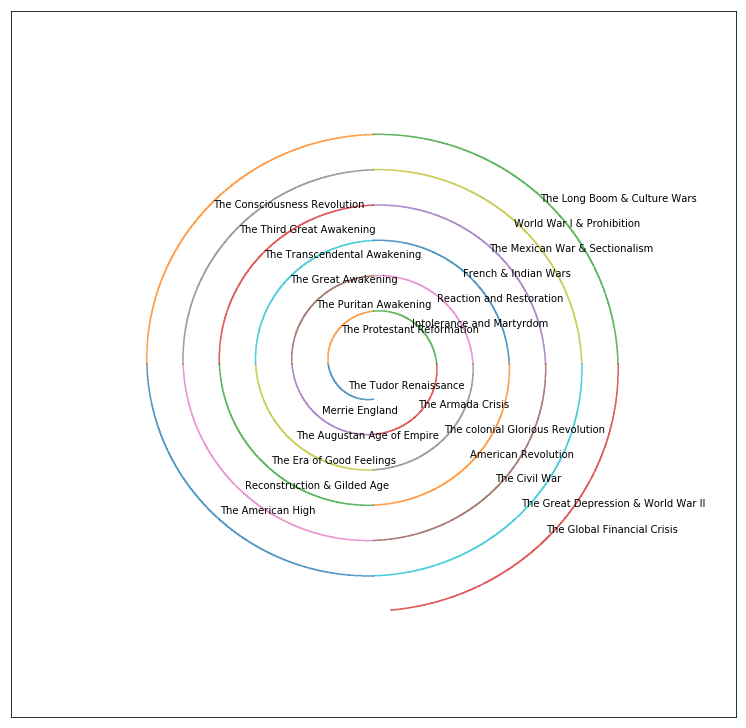

In [33]:

fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, autoscale_on=False)
ax.set_xlim(-1000, 1000)
ax.set_ylim(-1000, 1000)
for turning_name, row_series in turnings_df.iterrows():
    start_year = int(row_series['turning_begin_year'])
    stop_year = int(row_series['turning_end_year'])
    is_okay = True
    if start_year > max(ccw_history_year_dict.keys()):
        is_okay = False
    if start_year < min(ccw_history_year_dict.keys()):
        is_okay = False
    if stop_year < min(ccw_history_year_dict.keys()):
        is_okay = False
    if stop_year > max(ccw_history_year_dict.keys()):
        is_okay = False
    if is_okay:
        xy_list = get_one_arc(ccw_history_year_dict, start_year, stop_year, 0)
        PathCollection_obj = plt.plot([x[0] for x in xy_list], [y[1] for y in xy_list],
                                      alpha=0.75, label=turning_name)
        #add_spiral_labels([start_year, stop_year], ccw_history_year_dict, 0)
        radius, theta = ccw_history_year_dict[start_year]
        x, y = polar_to_cartesian(radius, theta-45)
        text_obj = plt.text(x, y, turning_name, fontsize=10)
        '''
        label_arc(start_year, stop_year, ccw_history_year_dict, ccw_history_theta_dict,
                  turning_name, 13, 0)
        '''
#Legend_obj = ax.legend()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [ ]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "notebook_path = " + "'"+attribs['data-notebook-path'].value+"'";
kernel.execute(command);

In [ ]:
# %load ../../load_magic/nbviewer.py

from IPython.display import HTML

notebook_viewer_url = 'https://nbviewer.jupyter.org/github/dbabbitt/notebooks/blob/master/'
notebook_viewer_url += '/'.join(notebook_path.split('/')[1:])
html_str = 'Click <a href="{}" target="_blank">here</a> to view notebook in nbviewer.'
HTML(html_str.format(notebook_viewer_url))